# Modelling

              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  905.000000  905.000000     905.000000  905.000000   905.000000   
mean    53.530387    0.788950       0.779006  132.423204   198.973481   
std      9.445431    0.408279       0.955770   18.546847   109.402163   
min     28.000000    0.000000       0.000000    0.000000     0.000000   
25%     47.000000    1.000000       0.000000  120.000000   173.000000   
50%     54.000000    1.000000       0.000000  130.000000   223.000000   
75%     60.000000    1.000000       2.000000  140.000000   267.000000   
max     77.000000    1.000000       3.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  905.000000  905.000000  905.000000      905.000000  905.000000   
mean     0.234254    0.990055  136.830939        0.405525    0.891160   
std      0.423766    0.630099   25.477717        0.491265    1.069338   
min      0.000000    0.000000   60.000000        0

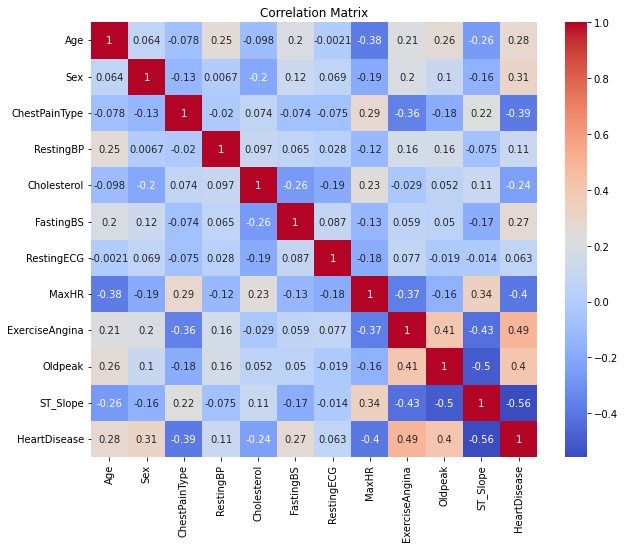

train Accuracy: 1.0
train Confusion Matrix:
 [[332   0]
 [  0 392]]
train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       392

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724

test Accuracy: 0.8176795580110497
test Confusion Matrix:
 [[51 21]
 [12 97]]
test Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        72
           1       0.82      0.89      0.85       109

    accuracy                           0.82       181
   macro avg       0.82      0.80      0.81       181
weighted avg       0.82      0.82      0.82       181



In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

data = pd.read_csv('heart.csv')
data.dropna(inplace=True)

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

print(data.describe())

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

X = data.drop('HeartDisease', axis=1) 
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)
/
print("train Accuracy:", accuracy_train)
print("train Confusion Matrix:\n", conf_matrix_train)
print("train Classification Report:\n", class_report_train)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("test Accuracy:", accuracy)
print("test Confusion Matrix:\n", conf_matrix)
print("test Classification Report:\n", class_report)


# Test Confusion Matrix

In [34]:
disp = ConfusionMatrixDisplay(conf_matrix)

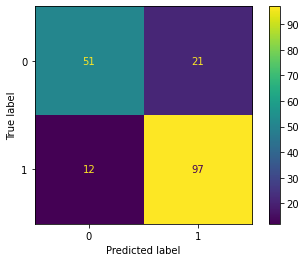

In [35]:
disp.plot()

# Train Confusion Matrix

In [36]:
disp = ConfusionMatrixDisplay(conf_matrix_train)

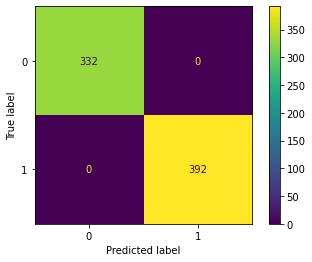

In [37]:
disp.plot()

# ROC-AUC

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

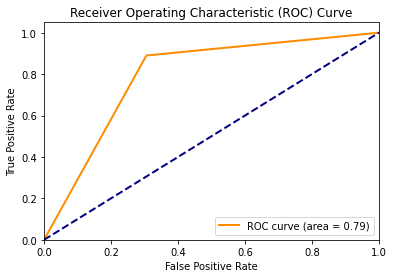

In [13]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

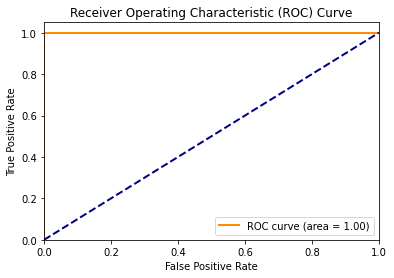

In [24]:
y_scores = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance

C:\Users\yagni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


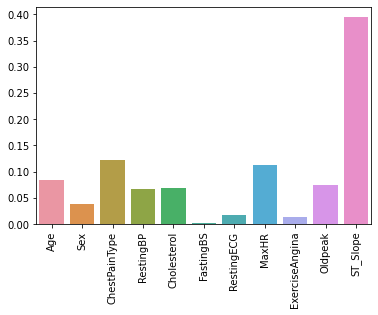

In [20]:
sns.barplot(X_train.columns,model.feature_importances_)
plt.xticks(rotation=90)
plt.show()